In [1]:
import torch

In [2]:
import torchvision
import torchvision.transforms as transforms

In [9]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import torch.optim as optim

from tqdm import notebook

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
trans = transforms.Compose([
                            transforms.Resize(224),
                            transforms.ToTensor()#
])

In [4]:
train_amazon = torchvision.datasets.ImageFolder(root = '/content/drive/MyDrive/office31/amazon',
                                                  transform = trans)

In [5]:
test_webcam = torchvision.datasets.ImageFolder(root = '/content/drive/MyDrive/office31/webcam',
                                                  transform = trans)

In [ ]:
data_loader_train_amazon= torch.utils.data.DataLoader(train_amazon, batch_size=16, shuffle=True, num_workers=2)

In [8]:
data_loader_test_webcam = torch.utils.data.DataLoader(test_webcam, batch_size=16, shuffle=True, num_workers=2)

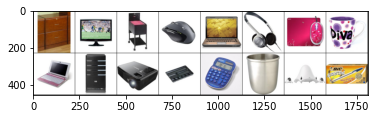

In [13]:
 def imshow(img):
     npimg = img.numpy()
     plt.imshow(np.transpose(npimg, (1, 2, 0)))
     plt.show()


# get some random training images
dataiter = iter(data_loader_train_amazon)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))


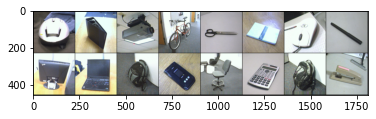

In [24]:
dataiter1 = iter(data_loader_test_webcam)
images1, labels1 = dataiter1.next()

imshow(torchvision.utils.make_grid(images1))

In [18]:
net = models.resnet50(pretrained=True)

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

def accuracy(out, labels):
    _,pred = torch.max(out, dim=1)
    return torch.sum(pred==labels).item()

num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs, 31)

In [20]:
n_epochs = 3
print_every = 10
val_loss = []
val_acc = []
train_loss = []
train_acc = []
total_step = len(data_loader_train_amazon)
for epoch in range(1, n_epochs+1):
    running_loss = 0.0
    correct = 0
    total=0
    print(f'Epoch {epoch}\n')
    for batch_idx, (data_, target_) in enumerate(notebook.tqdm(data_loader_train_amazon)):
        optimizer.zero_grad()
        
        outputs = net(data_)
        loss = criterion(outputs, target_)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _,pred = torch.max(outputs, dim=1)
        correct += torch.sum(pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % 20 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch, n_epochs, batch_idx, total_step, loss.item()))
    train_acc.append(100 * correct / total)
    train_loss.append(running_loss/total_step)
    print(f'\ntrain-loss: {np.mean(train_loss):.4f}, train-acc: {(100 * correct/total):.4f}')
    batch_loss = 0
    total_t=0
    correct_t=0
    with torch.no_grad():
        net.eval()
        for data_t, target_t in (data_loader_test_webcam):
            outputs_t = net(data_t)
            loss_t = criterion(outputs_t, target_t)
            batch_loss += loss_t.item()
            _,pred_t = torch.max(outputs_t, dim=1)
            correct_t += torch.sum(pred_t==target_t).item()
            total_t += target_t.size(0)
        val_acc.append(100 * correct_t/total_t)
        val_loss.append(batch_loss/len(data_loader_test_webcam))
        print(f'validation loss: {np.mean(val_loss):.4f}, validation acc: {(100 * correct_t/total_t):.4f}\n')

    net.train()

Epoch 1



  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [1/3], Step [0/177], Loss: 3.6209
Epoch [1/3], Step [20/177], Loss: 2.3739
Epoch [1/3], Step [40/177], Loss: 2.0239
Epoch [1/3], Step [60/177], Loss: 1.5461
Epoch [1/3], Step [80/177], Loss: 0.8324
Epoch [1/3], Step [100/177], Loss: 1.1579
Epoch [1/3], Step [120/177], Loss: 1.0740
Epoch [1/3], Step [140/177], Loss: 0.5257
Epoch [1/3], Step [160/177], Loss: 1.4125

train-loss: 1.5240, train-acc: 64.7497
validation loss: 1.3435, validation acc: 63.1447

Epoch 2



  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [2/3], Step [0/177], Loss: 0.6553
Epoch [2/3], Step [20/177], Loss: 0.4583
Epoch [2/3], Step [40/177], Loss: 0.3085
Epoch [2/3], Step [60/177], Loss: 1.2222
Epoch [2/3], Step [80/177], Loss: 1.0884
Epoch [2/3], Step [100/177], Loss: 0.7354
Epoch [2/3], Step [120/177], Loss: 0.3672
Epoch [2/3], Step [140/177], Loss: 0.5338
Epoch [2/3], Step [160/177], Loss: 0.2600

train-loss: 1.0378, train-acc: 87.6819
validation loss: 1.5294, validation acc: 58.2390

Epoch 3



  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [3/3], Step [0/177], Loss: 0.4492
Epoch [3/3], Step [20/177], Loss: 0.2434
Epoch [3/3], Step [40/177], Loss: 0.0716
Epoch [3/3], Step [60/177], Loss: 0.1956
Epoch [3/3], Step [80/177], Loss: 0.9520
Epoch [3/3], Step [100/177], Loss: 0.4947
Epoch [3/3], Step [120/177], Loss: 0.1792
Epoch [3/3], Step [140/177], Loss: 0.1380
Epoch [3/3], Step [160/177], Loss: 0.0880

train-loss: 0.7895, train-acc: 93.8587
validation loss: 1.7744, validation acc: 51.3208



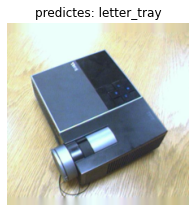

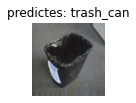

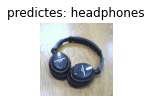

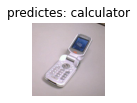

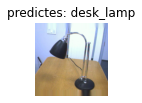

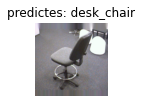

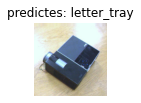

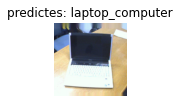

In [22]:
def visualize_model(net, num_images=4):
    images_so_far = 0
    fig = plt.figure(figsize=(15, 10))
    
    for i, data in enumerate(data_loader_test_webcam):
        inputs, labels = data
        
        outputs = net(inputs)
        _, preds = torch.max(outputs.data, 1)
        for j in range(inputs.size()[0]):
            images_so_far += 1
            ax = plt.subplot(2, num_images//2, images_so_far)
            ax.axis('off')
            ax.set_title('predictes: {}'.format(test_webcam.classes[preds[j]]))
            imshow(inputs[j])
            
            if images_so_far == num_images:
                return 

plt.ion()
visualize_model(net,8)
plt.ioff()